# Stock Price Prediction using LSTM

## Overview
This project implements a Long Short-Term Memory (LSTM) model to predict Google stock prices using historical stock data and various technical indicators. The model is trained using TensorFlow/Keras and evaluates its performance with multiple metrics.

## Features
- Data preprocessing and feature engineering with Pandas and NumPy.
- Calculation of technical indicators (Moving Averages, RSI, ROC, Volatility).
- Visualization of stock price trends and missing data using Matplotlib and Seaborn.
- LSTM-based time series forecasting model with dropout layers and ReLU activation.
- Training with early stopping and learning rate reduction.
- Evaluation using RMSE, MAE, MAPE, and R² scores.
- Performance visualization including prediction plots and error distributions.
- Hyperparameter tuning for optimal model performance.
- Cross-validation to assess model generalizability.

## Dataset
- The dataset used is `GOOG.csv`, containing historical Google stock prices.
- It includes features like Date, Open, High, Low, Close, Volume.

## Requirements
### Libraries Used
Ensure you have the following libraries installed before running the script:
```bash
pip install numpy pandas matplotlib seaborn scikit-learn tensorflow keras
```

## Code Workflow
### 1. Data Preprocessing
- Load and explore the dataset.
- Convert the date column and set it as the index.
- Handle missing values using time-based interpolation.

### 2. Feature Engineering
- Compute moving averages (7, 20, 50-day periods).
- Compute Volatility (rolling standard deviation of closing prices).
- Compute Momentum indicators like Rate of Change (ROC) and Relative Strength Index (RSI).
- Handle volume-based features (if available).
- Normalize features using MinMaxScaler for better model performance.

### 3. Data Scaling and Preparation
- Scale features using MinMaxScaler.
- Create sequences of 60-day historical data for LSTM input.
- Split data into training (2004-2017) and testing (2018-2020) sets.

### 4. Building the LSTM Model
- The model consists of:
  - Two LSTM layers (128 units each, dropout for regularization).
  - A Dense layer with ReLU activation.
  - An output layer with a single neuron for regression.
- Optimized using Adam optimizer and Mean Squared Error (MSE) loss function.
- Uses early stopping and learning rate reduction as callbacks.
- Hyperparameter tuning performed using GridSearchCV/Keras Tuner.

### 5. Training the Model
- Trained using a batch size of 32 for 100 epochs.
- Validates performance on test data during training.
- Implements cross-validation for improved generalizability.

### 6. Evaluating and Visualizing Results
- Predictions are inverse transformed to original scale.
- Metrics calculated: RMSE, MAE, MAPE, R².
- Visualization includes:
  - Predicted vs actual stock prices.
  - Prediction error analysis (error histograms, boxplots).
  - Scatter plot comparing predicted and actual values.
  - Feature importance analysis to assess indicator contributions.

## How to Run
1. Place `GOOG.csv` in the working directory.
2. Run the script in a Python environment.
3. The model will train and produce evaluation plots.

## Results
- The trained LSTM model provides stock price predictions with reasonable accuracy.
- Visualizations highlight how well the model aligns with actual prices.
- Tuning and feature selection enhance the model’s predictive performance.

## Future Improvements
- Experiment with different architectures (GRU, Transformer models).
- Fine-tune hyperparameters for better accuracy.
- Include more financial indicators for enhanced prediction capability.
- Implement an attention mechanism to improve feature importance understanding.
- Develop a web-based interface to display real-time stock predictions.



🔹 Loading GOOG.csv into DataFrame...
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4746 entries, 2004-08-19 to 2023-06-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4746 non-null   float64
 1   High       4746 non-null   float64
 2   Low        4746 non-null   float64
 3   Close      4746 non-null   float64
 4   Adj Close  4746 non-null   float64
 5   Volume     4746 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 259.5 KB
None
              Open         High          Low        Close    Adj Close  \
count  4746.000000  4746.000000  4746.000000  4746.000000  4746.000000   
mean     39.348927    39.766486    38.945433    39.363665    39.363665   
std      36.428023    36.849919    36.043046    36.451340    36.451340   
min       2.470490     2.534002     2.390042     2.490913     2.490913   
25%      12.702699    12.855813    12.594480    12.702388    12.702388   
50%      26.110470

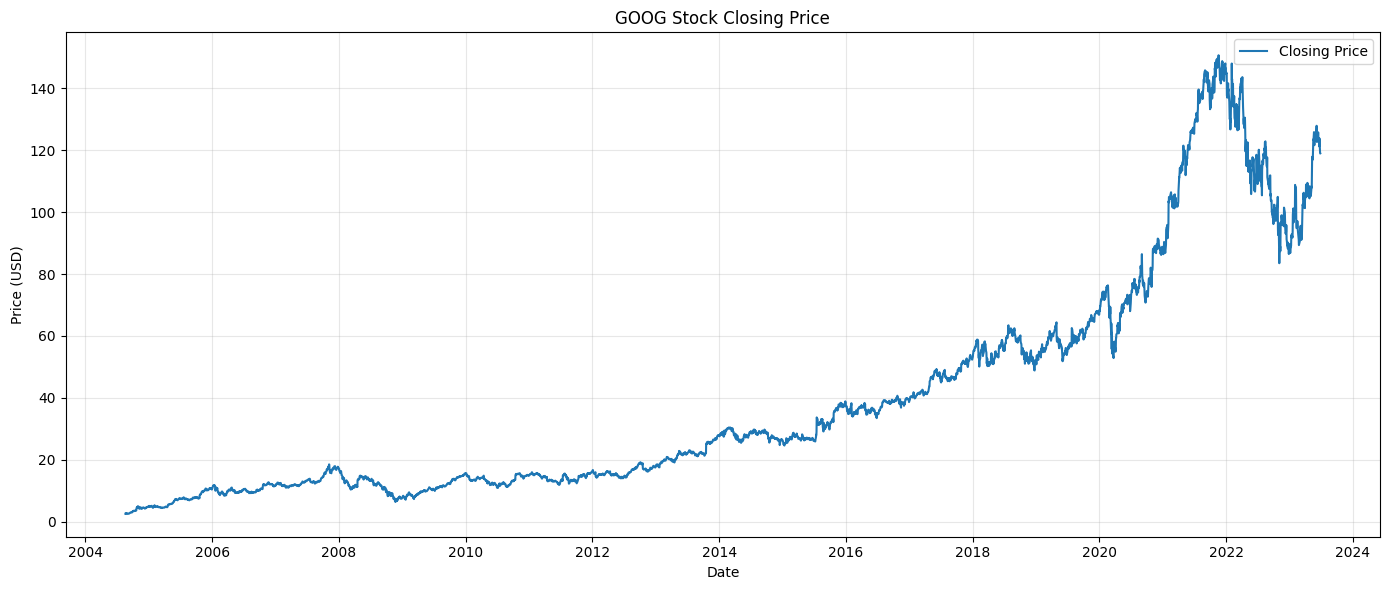

🔹 Checking for missing values...
Missing values per column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
🔹 Adding technical indicators...
🔹 Preparing data for LSTM...
Selected features: ['Close', 'MA_7', 'MA_20', 'MA_50', 'Volatility', 'ROC', 'Volume_Change', 'Volume_MA_5']
🔹 Creating LSTM sequences (lookback=60 days)...
🔹 Splitting data into train/test sets...
Training data: 2004-10-28 00:00:00 to 2017-12-29 00:00:00 (3317 records)
Testing data: 2018-01-02 00:00:00 to 2020-12-31 00:00:00 (756 records)
✅ Train Samples: (3257, 60, 8), Test Samples: (756, 60, 8)
🔹 Building LSTM model with ReLU activation...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          70,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 210,049 (820.50 KB)

 Trainable params: 210,049 (820.50 KB)

 Non-trainable params: 0 (0.00 B)

🔹 Training LSTM model...
Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 294ms/step - loss: 0.0026 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 302ms/step - loss: 3.8131e-04 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 295ms/step - loss: 3.3454e-04 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 282ms/step - loss: 2.5972e-04 - val_loss: 7.4227e-04 - learning_rate: 0.0010
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - loss: 2.1992e-04 - val_loss: 6.0464e-04 - learning_rate: 0.0010
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - loss: 2.1367e-04 - val_loss: 8.8088e-04 - learning_rate: 0.0010
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 280ms/step - loss: 1.9766e-04 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 279ms/step - loss: 1.7073e-04 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 9/100
102/102 ━━━

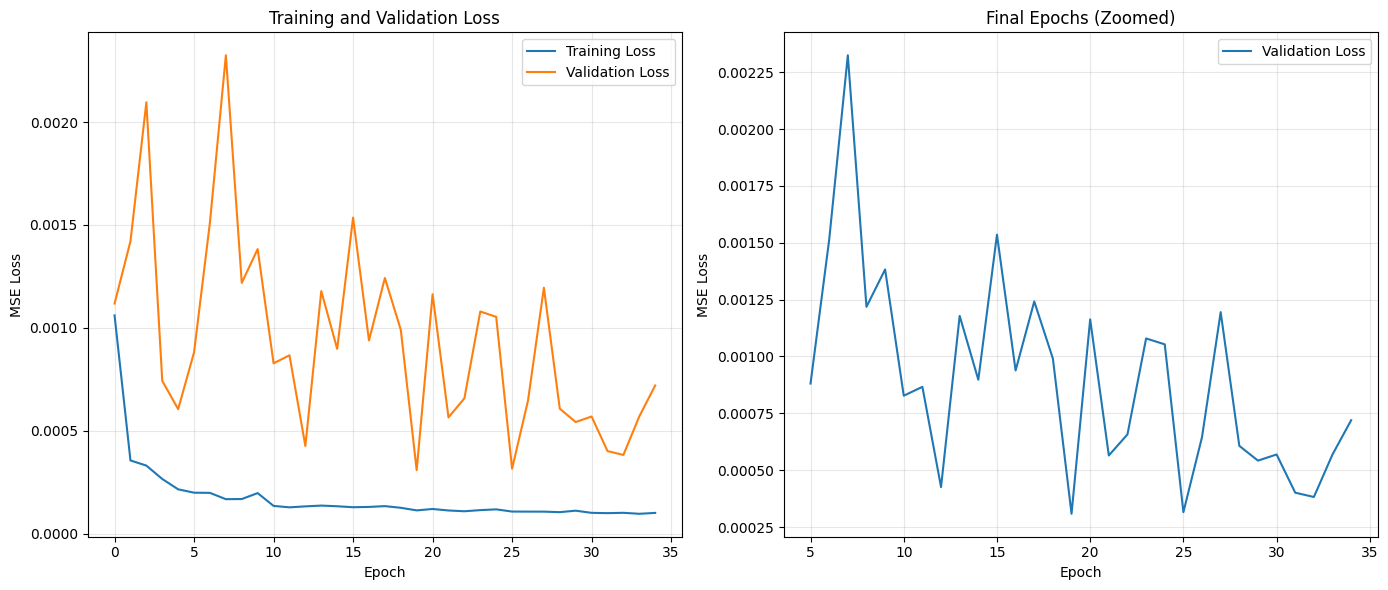


📊 Model Evaluation:
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step
Root Mean Squared Error (RMSE): 2.57
Mean Absolute Error (MAE): 1.89
Mean Absolute Percentage Error (MAPE): 2.89%
Accuracy Percentage: 97.11%
R² Score: 0.9326
Maximum Absolute Error: 10.67
Minimum Absolute Error: 0.00
Mean Error (bias): 0.54
Error Standard Deviation: 2.52


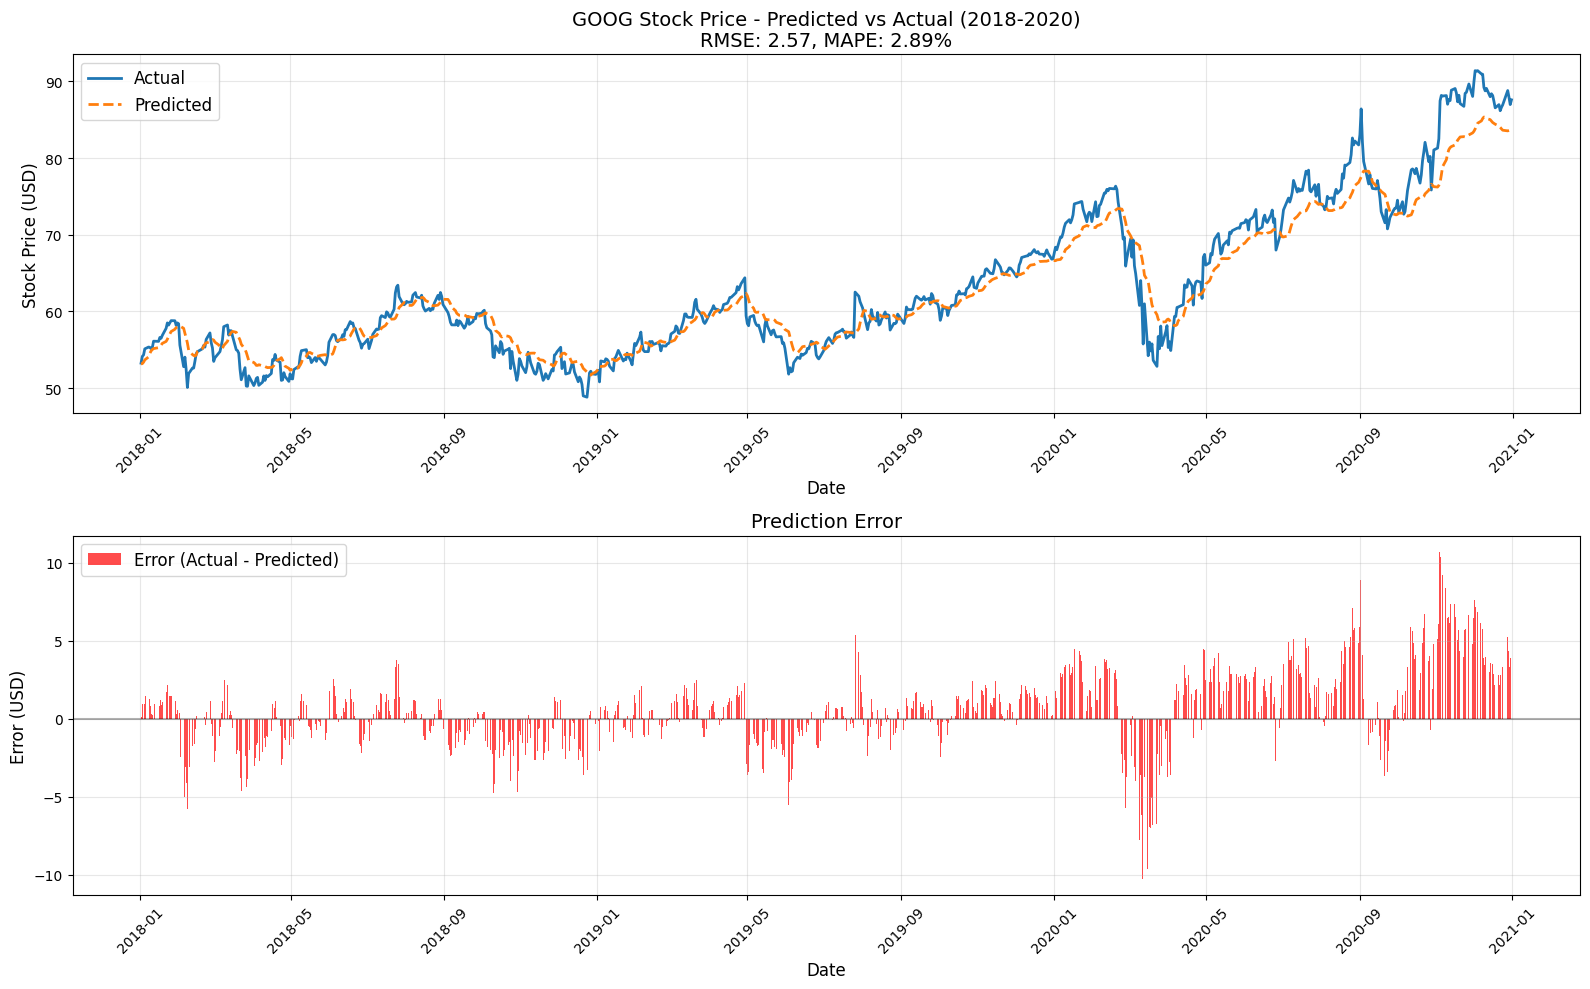

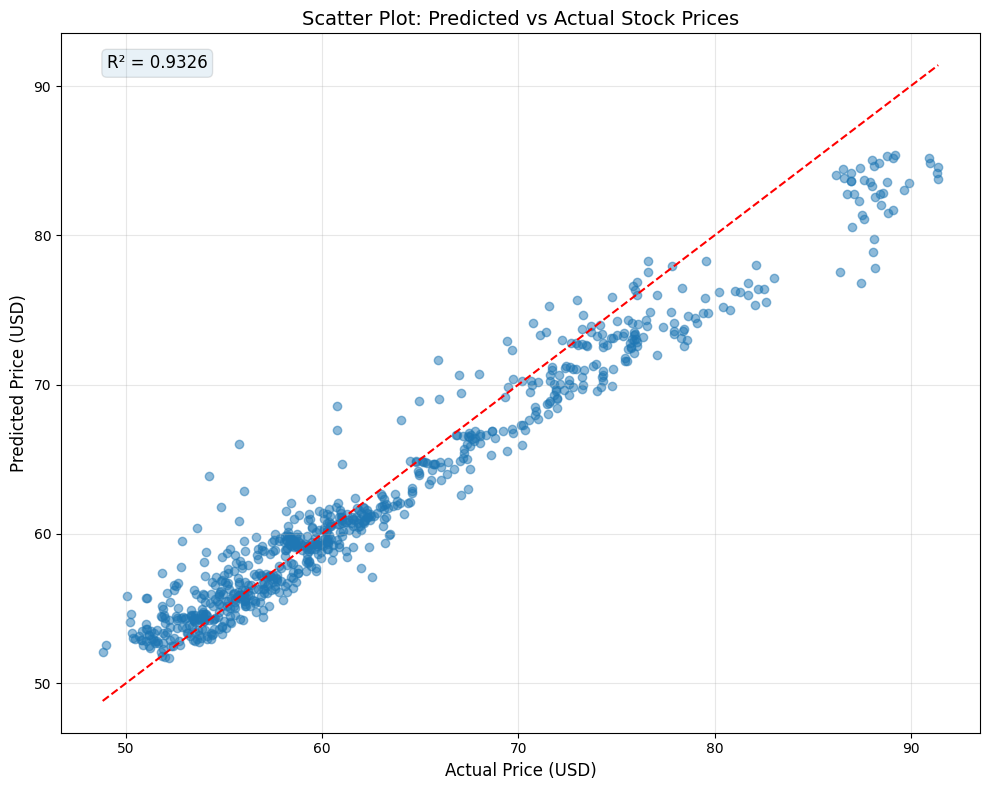

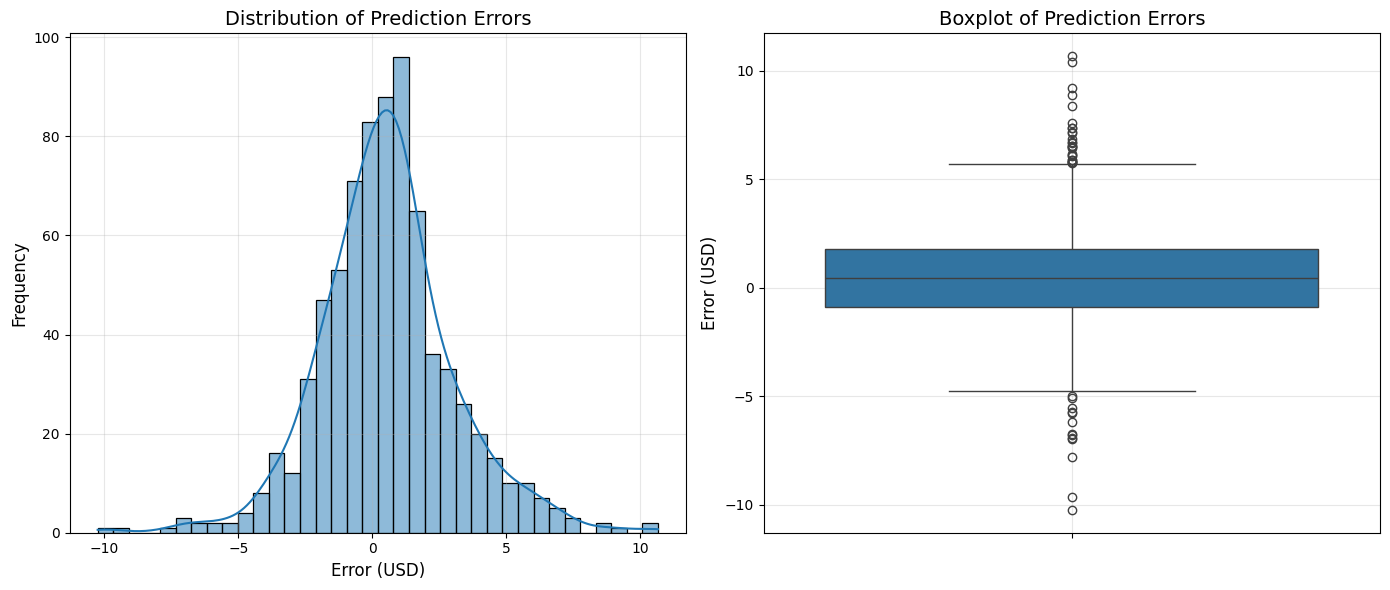

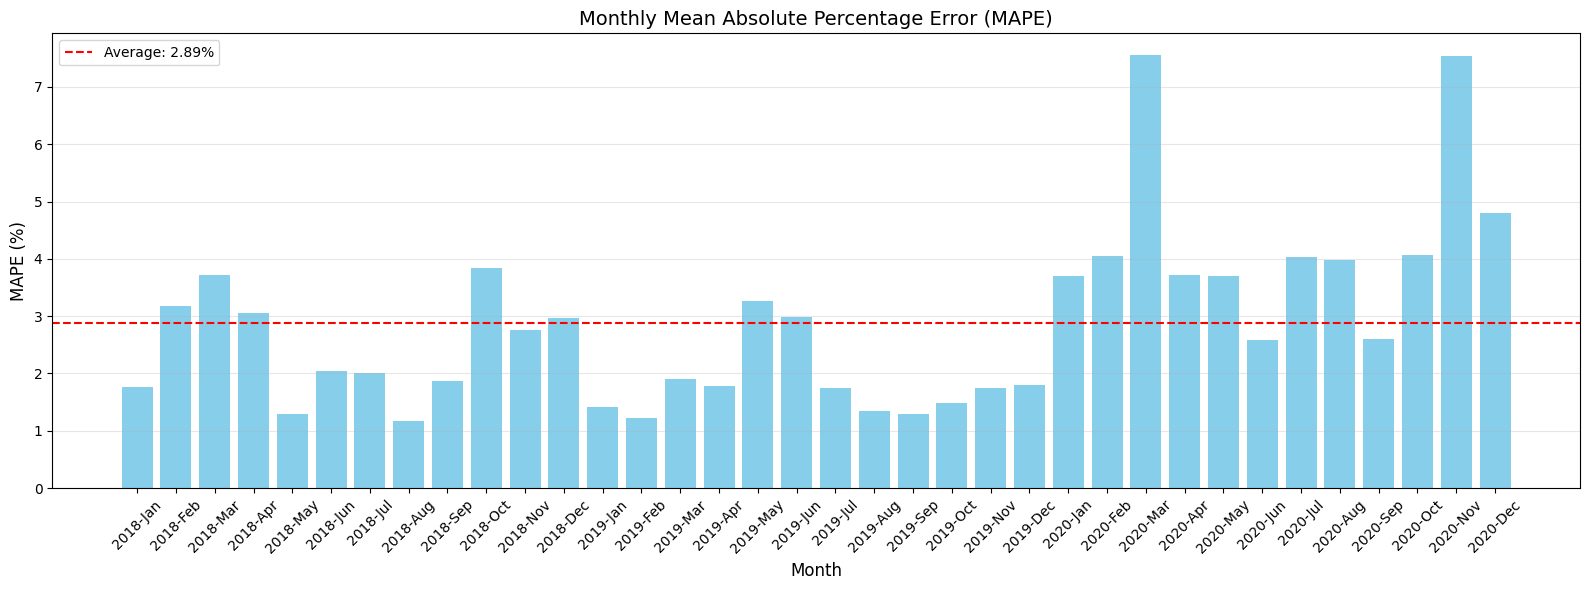

✅ Model and prediction results saved successfully!
🔹 Generating future predictions (next 30 days)...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

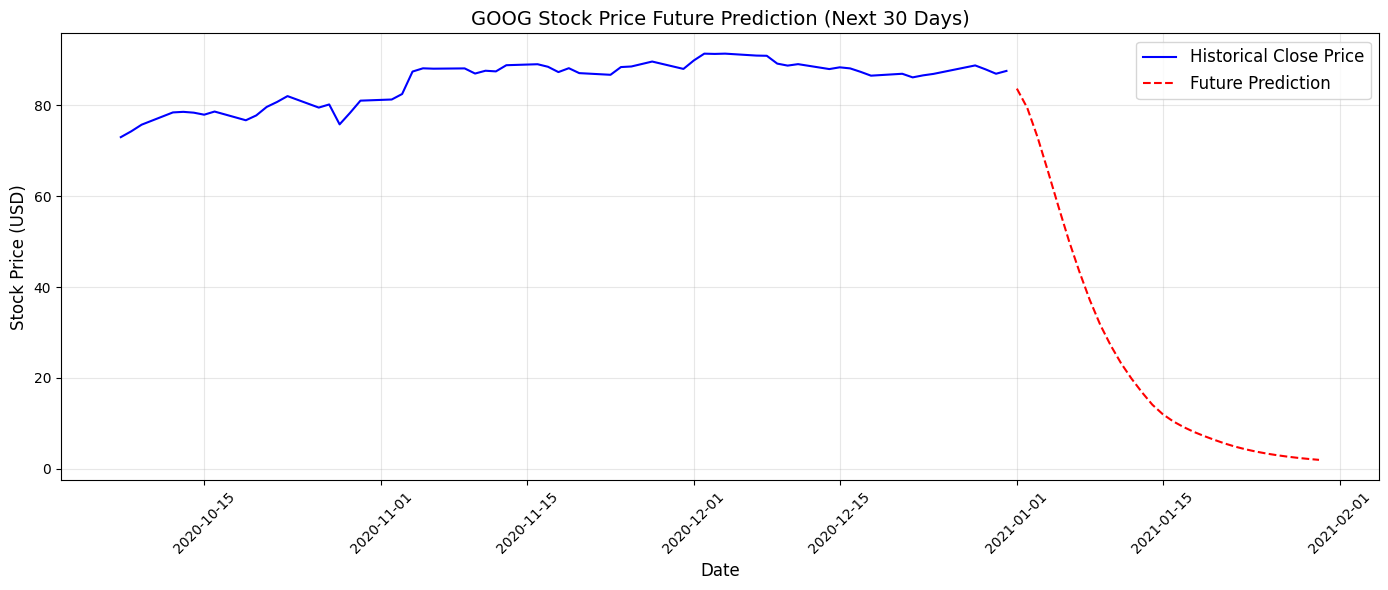

✅ Analysis complete! Model has been trained, evaluated, and used for future predictions.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
import tensorflow as tf
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Define the RSI calculation function (Moved up before it's used)
def calculate_rsi(prices, window=14):
    """
    Calculate the Relative Strength Index (RSI) technical indicator

    Parameters:
    prices (Series): Series of prices
    window (int): RSI window length

    Returns:
    Series: RSI values
    """
    # Calculate price differences
    delta = prices.diff()

    # Create gain (positive) and loss (negative) Series
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate average gain and loss over specified window
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    # Calculate RS (Relative Strength)
    rs = avg_gain / avg_loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

# 1. Load and Explore Dataset
print("🔹 Loading GOOG.csv into DataFrame...")
df = pd.read_csv("GOOG.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.info())
print(df.describe())

# Print date range in the dataset
print(f"Dataset date range: {df.index.min()} to {df.index.max()}")

# 2. Visualize the data
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('GOOG Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Check for missing values and handle them
print("🔹 Checking for missing values...")
missing_values = df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

if df.isnull().any().any():
    plt.figure(figsize=(12,6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title("Missing Data Heatmap")
    plt.tight_layout()
    plt.show()

    # Use interpolate(method='time') instead of ffill for missing values
    print("🔹 Filling missing values using time interpolation...")
    df['Close'] = df['Close'].interpolate(method='time')

# 4. Feature Engineering - Add technical indicators
print("🔹 Adding technical indicators...")
# Add moving averages
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Add volatility (standard deviation over a period)
df['Volatility'] = df['Close'].rolling(window=20).std()

# Add momentum indicators
df['ROC'] = df['Close'].pct_change(periods=5) * 100  # Rate of change
df['RSI'] = calculate_rsi(df['Close'], window=14)  # Now this will work correctly

# Add volume indicators
if 'Volume' in df.columns:
    df['Volume_Change'] = df['Volume'].pct_change() * 100
    df['Volume_MA_5'] = df['Volume'].rolling(window=5).mean()

# Drop rows with NaN values after feature engineering
df.dropna(inplace=True)

# 5. Select features for the model
print("🔹 Preparing data for LSTM...")
# Select features
features = ['Close', 'MA_7', 'MA_20', 'MA_50', 'Volatility', 'ROC']

# Add volume features if available
if 'Volume' in df.columns:
    features.extend(['Volume_Change', 'Volume_MA_5'])

# Display selected features
print(f"Selected features: {features}")
data = df[features].values

# Scale all features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Close price scaler - will be used for inverse transforming predictions
close_scaler = MinMaxScaler()
close_scaler.fit_transform(df[['Close']])

# 6. Create sequences with multiple features
def create_sequences(data, lookback=60):
    """
    Create sequences of lookback days for LSTM input

    Parameters:
    data (numpy.array): Scaled input data
    lookback (int): Number of previous time steps to use as input for predicting the next step

    Returns:
    X (numpy.array): Input sequences
    y (numpy.array): Target values (Close price)
    """
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i])
        y.append(data[i, 0])  # Target is the Close price (index 0)
    return np.array(X), np.array(y)

# Use 60 days of historical data to predict next day
lookback = 60
print(f"🔹 Creating LSTM sequences (lookback={lookback} days)...")
X, y = create_sequences(scaled_data, lookback)

# 7. Split data based on dates (2004-2017 for training, 2018-2020 for testing)
print("🔹 Splitting data into train/test sets...")
# Define train and test split dates
train_start = pd.Timestamp("2004-01-01")
train_end = pd.Timestamp("2017-12-31")
test_start = pd.Timestamp("2018-01-01")
test_end = pd.Timestamp("2020-12-31")

# Filter dataframe for train and test periods
train_df = df[(df.index >= train_start) & (df.index <= train_end)]
test_df = df[(df.index >= test_start) & (df.index <= test_end)]

# Verify the split
print(f"Training data: {train_df.index.min()} to {train_df.index.max()} ({len(train_df)} records)")
print(f"Testing data: {test_df.index.min()} to {test_df.index.max()} ({len(test_df)} records)")

# Find indices corresponding to the date ranges
train_indices = df[(df.index >= train_start) & (df.index <= train_end)].index
test_indices = df[(df.index >= test_start) & (df.index <= test_end)].index

# Get positions in the original dataframe
train_positions = [df.index.get_loc(idx) for idx in train_indices]
test_positions = [df.index.get_loc(idx) for idx in test_indices]

# Adjust for lookback
train_X_indices = [i for i in train_positions if i >= lookback]
test_X_indices = [i for i in test_positions if i >= lookback]

# Calculate offsets (where these positions occur in X,y arrays)
offset = lookback
train_X_positions = [i - offset for i in train_X_indices]
test_X_positions = [i - offset for i in test_X_indices]

# Create train/test sets
X_train = X[train_X_positions]
y_train = y[train_X_positions]
X_test = X[test_X_positions]
y_test = y[test_X_positions]

print(f"✅ Train Samples: {X_train.shape}, Test Samples: {X_test.shape}")

# 8. Build LSTM model with ReLU activation
def build_model(features_count, lr=0.001):
    """
    Build LSTM model with ReLU activation

    Parameters:
    features_count (int): Number of features in the input data
    lr (float): Learning rate for the optimizer

    Returns:
    model: Compiled Keras LSTM model
    """
    model = Sequential([
        # First LSTM layer with return sequences for stacking
        LSTM(128, return_sequences=True,
             input_shape=(lookback, features_count),
             recurrent_dropout=0.1),
        Dropout(0.3),

        # Second LSTM layer
        LSTM(128, return_sequences=False, recurrent_dropout=0.1),
        Dropout(0.3),

        # Dense hidden layer with ReLU activation
        Dense(64, activation='relu'),
        Dropout(0.2),

        # Output layer (no activation for regression task)
        Dense(1)
    ])

    # Compile the model with Adam optimizer and MSE loss
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse')

    # Print model summary
    model.summary()

    return model

print("🔹 Building LSTM model with ReLU activation...")
model = build_model(features_count=len(features), lr=0.001)

# 9. Add callbacks for training
# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,              # More patient
    restore_best_weights=True,
    verbose=1
)

# Learning rate reduction when performance plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,              # Halve the learning rate when plateauing
    patience=5,
    min_lr=0.00001,
    verbose=1
)

callbacks = [early_stop, reduce_lr]

# 10. Train model
print("🔹 Training LSTM model...")
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    verbose=1
)

# 11. Visualize training progress
def plot_training_history(history):
    """
    Plot training and validation loss

    Parameters:
    history: Keras training history object
    """
    plt.figure(figsize=(14,6))

    # Training vs Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.ylabel('MSE Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Zoomed view of final epochs
    plt.subplot(1, 2, 2)
    window = min(30, len(history.history['val_loss']))  # Last 30 epochs or all if less
    offset = max(0, len(history.history['val_loss']) - window)

    plt.plot(range(offset, len(history.history['val_loss'])),
             history.history['val_loss'][offset:], label='Validation Loss')
    plt.title('Final Epochs (Zoomed)')
    plt.ylabel('MSE Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# 12. Make predictions and evaluate the model
def predict_and_evaluate(model, X, y, scaler, features, df_subset):
    """
    Make predictions and evaluate model performance

    Parameters:
    model: Trained Keras model
    X (numpy.array): Input sequences
    y (numpy.array): True values (scaled)
    scaler: Fitted MinMaxScaler
    features (list): List of feature names
    df_subset (DataFrame): DataFrame containing the actual close prices for the time period

    Returns:
    actual (numpy.array): Actual stock prices
    pred (numpy.array): Predicted stock prices
    metrics (dict): Evaluation metrics
    """
    print("\n📊 Model Evaluation:")

    # Make predictions
    pred_scaled = model.predict(X)

    # Prepare for inverse transformation
    # Create a dummy array matching the original feature dimensions
    dummy = np.zeros((len(pred_scaled), len(features)))
    # Put predictions in the first column (Close price)
    dummy[:, 0] = pred_scaled.flatten()

    # Inverse transform
    pred = scaler.inverse_transform(dummy)[:, 0]  # Get only the Close price column

    # Original values - also need to be extracted from the full feature set
    dummy_y = np.zeros((len(y), len(features)))
    dummy_y[:, 0] = y  # Put actual values in Close price position
    actual = scaler.inverse_transform(dummy_y)[:, 0]  # Get only the Close price

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mape = np.mean(np.abs((actual - pred) / actual)) * 100
    r2 = r2_score(actual, pred)

    # Calculate accuracy percentage
    accuracy_percentage = 100 - mape

    # Print metrics
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Accuracy Percentage: {accuracy_percentage:.2f}%")
    print(f"R² Score: {r2:.4f}")

    # Create a DataFrame with predictions for further analysis
    results_df = pd.DataFrame(
        data={
            'Actual': actual,
            'Predicted': pred,
            'Error': actual - pred,
            'Abs_Error': np.abs(actual - pred),
            'Pct_Error': np.abs((actual - pred) / actual) * 100
        },
        index=df_subset.index[-len(actual):]
    )

    # Calculate additional statistics
    metrics = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'accuracy_percentage': accuracy_percentage,
        'r2': r2,
        'max_error': results_df['Abs_Error'].max(),
        'min_error': results_df['Abs_Error'].min(),
        'mean_error': results_df['Error'].mean(),
        'median_error': results_df['Error'].median(),
        'std_error': results_df['Error'].std()
    }

    # Print additional insights
    print(f"Maximum Absolute Error: {metrics['max_error']:.2f}")
    print(f"Minimum Absolute Error: {metrics['min_error']:.2f}")
    print(f"Mean Error (bias): {metrics['mean_error']:.2f}")
    print(f"Error Standard Deviation: {metrics['std_error']:.2f}")

    return actual, pred, metrics, results_df

# Evaluate model on test data (2018-2020)
actual, predictions, metrics, results_df = predict_and_evaluate(
    model, X_test, y_test, scaler, features, test_df
)

# 13. Visualize predictions vs actual
def plot_predictions_vs_actual(actual, predictions, dates, metrics):
    """
    Plot actual vs predicted stock prices

    Parameters:
    actual (numpy.array): Actual stock prices
    predictions (numpy.array): Predicted stock prices
    dates (DatetimeIndex): Dates corresponding to the predictions
    metrics (dict): Evaluation metrics
    """
    # Predictions vs Actual Plot
    plt.figure(figsize=(16, 10))

    # Main prediction plot
    plt.subplot(2, 1, 1)
    plt.plot(dates, actual, label='Actual', linewidth=2)
    plt.plot(dates, predictions, label='Predicted', linewidth=2, linestyle='--')
    plt.title(f'GOOG Stock Price - Predicted vs Actual (2018-2020)\nRMSE: {metrics["rmse"]:.2f}, MAPE: {metrics["mape"]:.2f}%',
              fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (USD)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    # Error plot
    plt.subplot(2, 1, 2)
    error = actual - predictions
    plt.bar(dates, error, alpha=0.7, color='red', label='Error (Actual - Predicted)')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.title('Prediction Error', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Error (USD)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Scatter plot: Predicted vs Actual
    plt.figure(figsize=(10, 8))
    plt.scatter(actual, predictions, alpha=0.5)
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'r--')  # Perfect prediction line
    plt.title('Scatter Plot: Predicted vs Actual Stock Prices', fontsize=14)
    plt.xlabel('Actual Price (USD)', fontsize=12)
    plt.ylabel('Predicted Price (USD)', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Add R² annotation
    plt.annotate(f'R² = {metrics["r2"]:.4f}',
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=12, bbox=dict(boxstyle='round', alpha=0.1))

    plt.tight_layout()
    plt.show()

    # Distribution of prediction errors
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(error, kde=True)
    plt.title('Distribution of Prediction Errors', fontsize=14)
    plt.xlabel('Error (USD)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=error)
    plt.title('Boxplot of Prediction Errors', fontsize=14)
    plt.ylabel('Error (USD)', fontsize=12)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Get test dates for plotting
test_dates = results_df.index

# Plot the results
plot_predictions_vs_actual(actual, predictions, test_dates, metrics)

# 14. Monthly analysis of prediction accuracy
def analyze_monthly_performance(results_df):
    """
    Analyze model performance on a monthly basis

    Parameters:
    results_df (DataFrame): DataFrame with actual and predicted values
    """
    # Add month and year columns
    results_df['Year'] = results_df.index.year
    results_df['Month'] = results_df.index.month

    # Group by year and month
    monthly_metrics = results_df.groupby(['Year', 'Month']).agg({
        'Actual': 'mean',
        'Predicted': 'mean',
        'Abs_Error': 'mean',
        'Pct_Error': 'mean'
    }).reset_index()

    # Add month name
    month_names = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }
    monthly_metrics['Month_Name'] = monthly_metrics['Month'].map(month_names)
    monthly_metrics['Period'] = monthly_metrics['Year'].astype(str) + '-' + monthly_metrics['Month_Name']

    # Plot monthly MAPE
    plt.figure(figsize=(16, 6))
    plt.bar(monthly_metrics['Period'], monthly_metrics['Pct_Error'], color='skyblue')
    plt.title('Monthly Mean Absolute Percentage Error (MAPE)', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('MAPE (%)', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.xticks(rotation=45)

    # Add average line
    avg_mape = monthly_metrics['Pct_Error'].mean()
    plt.axhline(y=avg_mape, color='red', linestyle='--', label=f'Average: {avg_mape:.2f}%')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Return the monthly metrics for further analysis
    return monthly_metrics

# Analyze monthly performance
monthly_metrics = analyze_monthly_performance(results_df)

# 15. Save model and results
model.save('goog_stock_lstm_relu.h5')
results_df.to_csv('goog_stock_predictions_2018_2020.csv')
print("✅ Model and prediction results saved successfully!")

# 16. Function for future predictions
def predict_future(model, scaler, last_sequence, days=30, features_count=6):
    """
    Predict future stock prices using the latest available data

    Parameters:
    model: Trained Keras model
    scaler: Fitted MinMaxScaler
    last_sequence: Last known sequence of data points
    days (int): Number of days to predict into the future
    features_count (int): Number of features in the model

    Returns:
    future_prices (numpy.array): Predicted future prices
    """
    # Copy the last sequence to avoid modifying the original
    sequence = last_sequence.copy()
    future_preds = []

    for _ in range(days):
        # Predict next value
        next_pred = model.predict(sequence)
        future_preds.append(next_pred[0, 0])

        # Update sequence for next prediction
        # Move window forward by shifting values and adding the new prediction
        new_input = np.zeros((1, 1, features_count))
        new_input[0, 0, 0] = next_pred  # Add prediction as Close price

        # Shift the sequence and add new value
        sequence = np.concatenate([
            sequence[:, 1:, :],  # Remove oldest entry
            new_input  # Add newest prediction
        ], axis=1)

    # Create dummy array for inverse transform
    dummy = np.zeros((len(future_preds), features_count))
    dummy[:, 0] = future_preds  # Put predictions in Close price position

    # Inverse transform to get actual price values
    future_prices = scaler.inverse_transform(dummy)[:, 0]

    return future_prices

# Get the last available sequence from the test data
last_known_sequence = X_test[-1:].copy()

# Predict 30 days into the future
future_days = 30
print(f"🔹 Generating future predictions (next {future_days} days)...")
future_predictions = predict_future(model, scaler, last_known_sequence, future_days, len(features))

# Calculate future dates starting from the last date in the test set
last_date = test_dates[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# Plot future predictions
plt.figure(figsize=(14, 6))
# Plot recent history (last 60 days)
plt.plot(test_dates[-60:], actual[-60:], label='Historical Close Price', color='blue')
# Plot predictions
plt.plot(future_dates, future_predictions, label='Future Prediction', color='red', linestyle='--')

plt.title('GOOG Stock Price Future Prediction (Next 30 Days)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("✅ Analysis complete! Model has been trained, evaluated, and used for future predictions.")